In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os

import plotly

import cufflinks as cf         
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
pyo.init_notebook_mode(connected=True)         #connect plotly with jupyter offline
cf.go_offline()

In [4]:
df = pd.read_csv("/home/rebelroar/JupyterCode/Heart Disease-Classification/heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

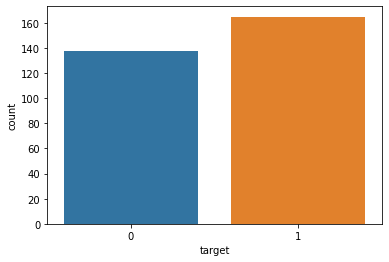

In [37]:
sns.countplot(x='target', data = df)
plt.show()

In [9]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Percentage of Patients haven't Heart Disease: {:.2f}%".format(countNoDisease/(len(df.target))*100))
print("Percentage of Patients have Heart Disease: {:.2f}%".format(countHaveDisease/(len(df.target))*100))

Percentage of Patients haven't Heart Disease: 45.54%
Percentage of Patients have Heart Disease: 54.46%


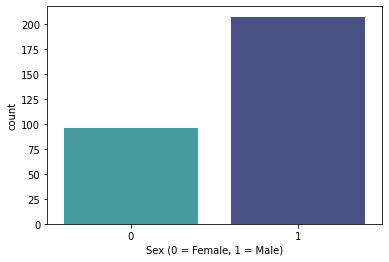

In [10]:
sns.countplot(x='sex', data=df, palette='mako_r')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.show()

In [11]:
countFemale = len(df[df.sex==0])
countMale = len(df[df.sex==1])
print("Percentage of Female Patients:{:.2f}%".format(countFemale/(len(df.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format(countMale/(len(df.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [12]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


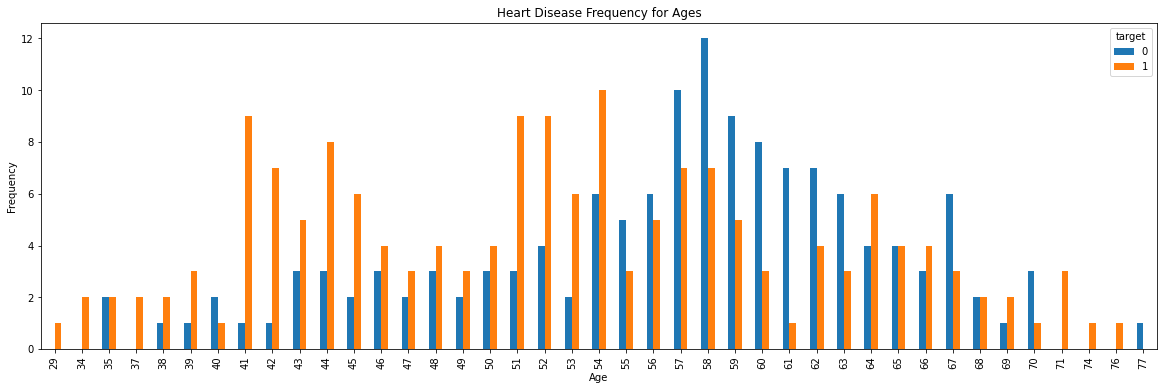

In [13]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

#plotly bar
pd.crosstab(df.age, df.target).iplot(kind='bar',title='Heart Disease Frequency for Ages',
                                    xTitle='Age',yTitle='Frequency')

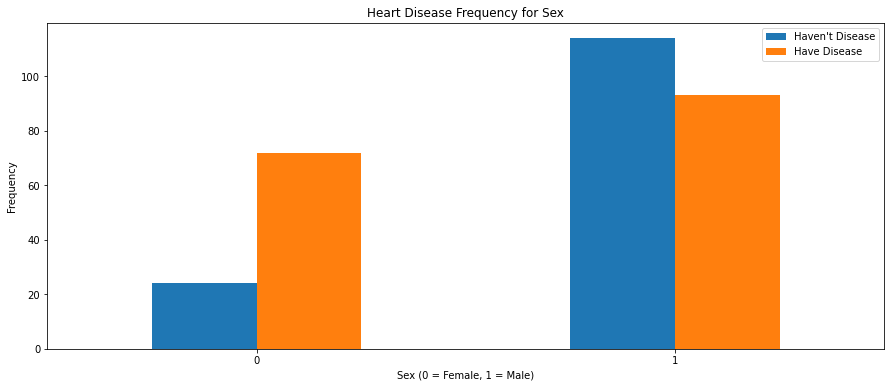

In [14]:
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


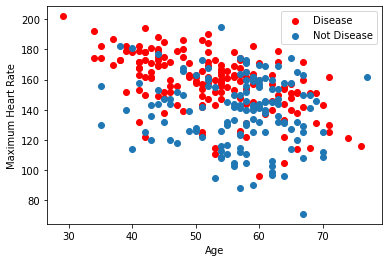

In [15]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

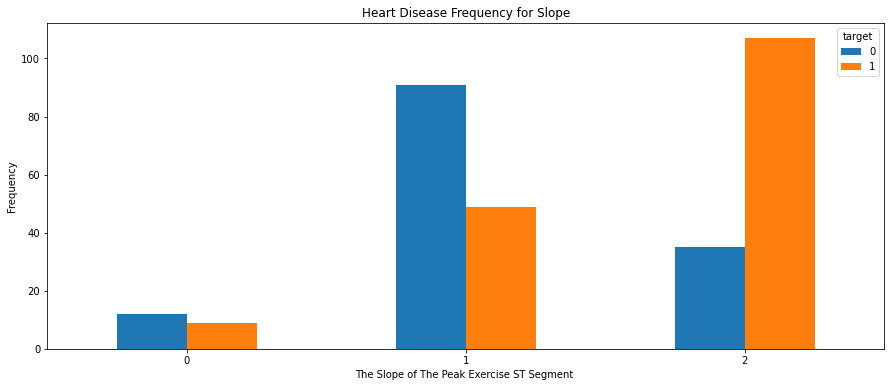

In [16]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

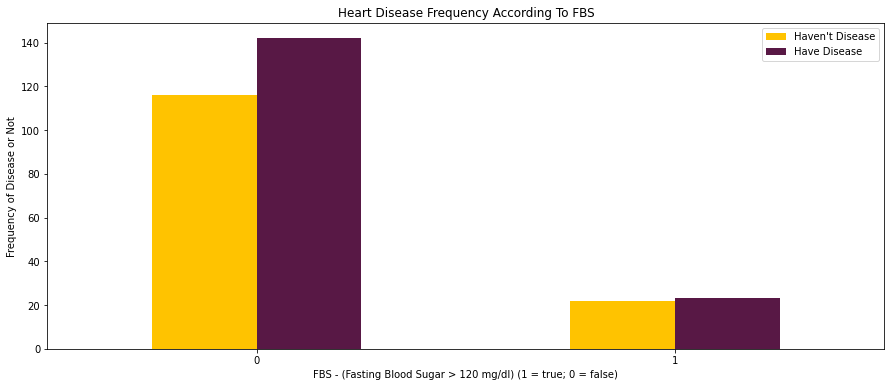

In [17]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

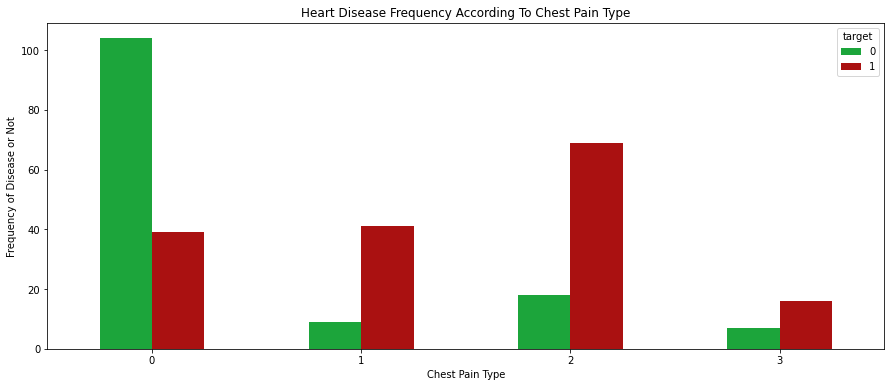

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

Since 'cp','thal' and 'slope' are categorical variables we will turn 
into dummy variables

In [19]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [20]:
a

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
298,1,0,0,0
299,0,0,0,1
300,1,0,0,0
301,1,0,0,0


In [21]:
l = [df,a,b,c]
df = pd.concat(l, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [22]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Creating Model for Logistic Regression

We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score

In [23]:
y = df.target.values
x_data = df.drop(['target'],axis=1)
x_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,...,0,0,0,0,0,0,1,0,1,0
299,45,1,110,264,0,1,132,0,1.2,0,...,0,0,1,0,0,0,1,0,1,0
300,68,1,144,193,1,1,141,0,3.4,2,...,0,0,0,0,0,0,1,0,1,0
301,57,1,130,131,0,1,115,1,1.2,1,...,0,0,0,0,0,0,1,0,1,0


# Normalize Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [24]:
# Normalize
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.00,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,0.00,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [26]:
x_train.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
74,0.291667,0.0,0.264151,0.198630,0.0,0.5,0.717557,0.0,0.032258,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
153,0.770833,0.0,0.490566,0.347032,0.0,0.0,0.618321,0.0,0.000000,0.25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
64,0.604167,1.0,0.433962,0.194064,1.0,0.0,0.717557,0.0,0.000000,0.00,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
296,0.708333,0.0,0.283019,0.162100,0.0,0.5,0.496183,1.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
287,0.583333,1.0,0.566038,0.242009,0.0,0.0,0.709924,0.0,0.000000,0.25,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
x_train.head()

,74,153,64,296,287,286,236,126,73,20,...,242,277,211,9,195,251,192,117,47,172
age,0.291667,0.770833,0.604167,0.708333,0.583333,0.625000,0.604167,0.375000,0.458333,0.625000,...,0.729167,0.583333,0.666667,0.583333,0.625000,0.291667,0.520833,0.562500,0.375000,0.604167
sex,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
trestbps,0.264151,0.490566,0.433962,0.283019,0.566038,0.377358,0.292453,0.169811,0.433962,0.386792,...,0.481132,0.283019,0.245283,0.528302,0.716981,0.358491,0.245283,0.245283,0.415094,0.245283
chol,0.198630,0.347032,0.194064,0.162100,0.242009,0.178082,0.397260,0.178082,0.308219,0.246575,...,0.196347,0.308219,0.305936,0.095890,0.456621,0.276256,0.141553,0.152968,0.299087,0.360731
fbs,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


Let's say weight = 0.01 and bias = 0.0

In [28]:
#initialize
def initialize(dimension):
    weight = np.full((dimension,1), 0.01)
    bias = 0.0
    return weight, bias

## Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [29]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

### Cost Function
<br>
<img src="https://i.stack.imgur.com/XbU4S.png" width="500px"/>

<br>

<img src="https://i.stack.imgur.com/pYVzl.png" width="500px"/>

Here:<br>
* h0(x^i)=y_head
* y^i = y_train
* x^i = x_train

In [30]:
def CostAndGradients(weight, bias, x_train, y_train):
    
    # Cost function
    
    hypothesis = sigmoid(np.dot(weight.T,x_train)+bias)
    loss = -(y_train*np.log(hypothesis)+(1-y_train)*np.log(1-hypothesis))
    cost = np.sum(loss)/x_train.shape[1]
    
    #Gradient Descent
    
    derivative_weight = np.dot(x_train, ((hypothesis-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(hypothesis-y_train)/x_train.shape[1]
    gradients = {'Derivative Weight':derivative_weight, 'Derivative Bias':derivative_bias}
    
    return cost, gradients

In [31]:
def update(weight, bias, x_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    for i in range(iteration):
        cost, gradients = CostAndGradients(weight, bias, x_train, y_train)
        weight = weight -learningRate*gradients['Derivative Weight']
        bias = bias - learningRate*gradients['Derivative Bias']
        
        costList.append(cost)
        index.append(i)
    
    parameters = {'weight':weight, 'bias':bias}
    print('iteration', iteration)
    print('cost', cost)

    plt.plot(index, costList)
    plt.xlabel('Number of Iteration')
    plt.ylabel('Cost')
    plt.show()

    return parameters, gradients        

In [32]:
def predict(weight, bias, x_test):
    z = np.dot(weight.T, x_test)+bias
    hypothesis = sigmoid(z)
    
    y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(hypothesis.shape[1]):
        if hypothesis[0,i]<=0.5:
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [33]:
def logistic_regression(x_train, y_train, x_test, y_test, learningRate, iteration):

    dimension = x_train.shape[0]
    weight, bias = initialize(dimension)
    
    parameters, gradients = update(weight, bias, x_train, y_train, learningRate, iteration)
    
    
    y_prediction = predict(parameters['weight'], parameters['bias'], x_test)
    
    print('Manual test Accuracy: {:.2f}%'.format((100-np.mean(np.abs(y_prediction-y_test))*100)))

iteration 100
cost 0.35977361236645333


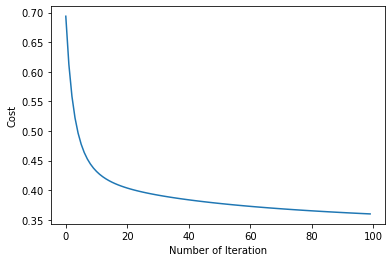

Manual test Accuracy: 86.89%


In [34]:
logistic_regression(x_train, y_train, x_test, y_test, 1,100)

## <font color="blue">Manual Test Accuracy is <font color="red">**86.89%**</font></font><br>
Let's find out sklearn's score.

## Sklearn Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc = lr.score(x_test.T, y_test.T)*100

print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 86.89%


## <font color = "purple">Our model works with <font color="red">**86.89%**</font> accuracy.</font>